In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as  tf

/home/gabriel/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/gabriel/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/gabriel/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/gabriel/.local/lib/python3.7/site-packages/tensorflow/python/framework/dtypes.py:5

In [2]:
import IPython.display as display
from PIL import Image
import os
import pathlib
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import load_model

In [35]:
PATH = './data/animals10/test/chicken.jpg'
MODEL_PATH = './new_model_1'
IMG_WIDTH,IMG_HEIGHT = (128,128)

In [30]:
def load_image( infilename ) :
    img = Image.open( infilename )
    img.load()

    
    img = img.resize((IMG_WIDTH,IMG_HEIGHT))
    data = np.asarray( img, dtype="int32" )
    data = data.reshape(1,IMG_WIDTH,IMG_HEIGHT,3)
    data = tf.cast(data, tf.float32)
    data /= 255
    
    return data

In [36]:
image_gen = ImageDataGenerator(rescale=1./255)
img = load_image(PATH)

FileNotFoundError: [Errno 2] No such file or directory: './data/animals10/test/chicken.jpg'

In [32]:
keras_model_path = MODEL_PATH
loaded_model = load_model(keras_model_path)

In [26]:
import pandas as pd
import seaborn as sns

<Figure size 432x288 with 0 Axes>

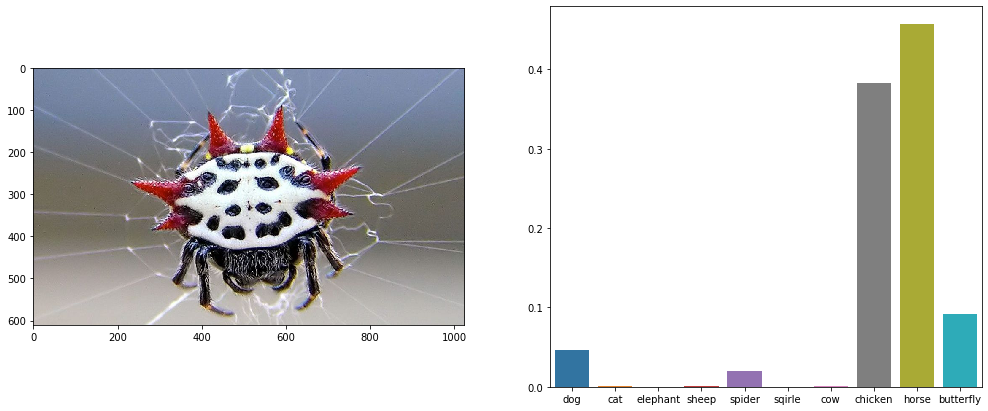

In [33]:
plt.tight_layout()
figsize=(17,7)
fig, axes = plt.subplots(1,2, figsize = figsize)


predictions = loaded_model.predict_on_batch(img)

axes[0].imshow(Image.open(PATH))

classes = ['dog','cat','elephant','sheep','spider','sqirle','cow','chicken','horse','butterfly']

classes[list(predictions[0] == np.array(predictions).max()).index(True)]
frame = pd.DataFrame(data = [list(predictions[0])], columns=classes)
sns.barplot(x = classes, y = predictions[0], ax = axes[1])